# Projeto eletromag - grupo 10 #

###### Integrantes: Alberto Carrera, Felipe Trintim, João Pedro Rodrigues, Matheus Castellucci 

### Etapa 1 ###

1)

para calcular a frequencia de ressonancia de um conjunto rlc, temos aa formula 

fr = 1/(2 * pi * sqrt(LC))

2)

In [240]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [241]:
#indutâncias
L1 = L2 = 50e-3

#resistências
R1 = R2 = 0.5
Rc = 400

#frequência
f = 60

#capacitância
C1 = C2 = 1e-9

fr=1/(2*pi*sqrt(L1*C1))
print(fr)

#tensão da fonte (pico)
Ufonte = 5
k = 0.1
M = k * sqrt(L1*L2)


(22507.90790392765+0j)


In [242]:
def CalcularTransformador(Uf, Rc, f):
    
    w = 2*pi*f
    XL1=1j*w*L1
    XL2=1j*w*L2
    M=k*sqrt(L1*L2)
    XM=1j*w*M
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    paralelo = (XC2*Rc)/(XC2+Rc)
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    V2=i[1]*paralelo
    return i[0], i[1], V2

In [243]:
def CalcularTransformador5(Uf, Rc, f):

    C1 = C2 = 1/(((2*pi)**2)*(fr**2)*L1)
    w = 2*pi*f
    XL1=1j*w*L1
    XL2=1j*w*L2
    M=k*sqrt(L1*L2)
    XM=1j*w*M
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    paralelo = (XC2*Rc)/(XC2+Rc)
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    V2=i[1]*paralelo
    return i[0], i[1], V2

3)

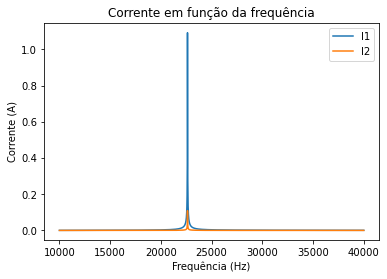

In [244]:
listaf = np.arange(10000, 40000, 10)
listai1 = []
listai2 = []

for f in listaf:
    i1, i2, v2 = CalcularTransformador(Ufonte, Rc, f)
    listai1.append(abs(i1))
    listai2.append(abs(i2))

plt.plot(listaf, listai1, label="I1")
plt.plot(listaf, listai2, label="I2")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.title("Corrente em função da frequência")
plt.legend()
plt.show()



4)

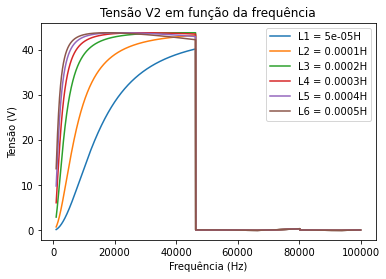

In [245]:
listal1 = [50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
listaLS = ["L1", "L2", "L3", "L4", "L5", "L6"]
listafr = np.arange(1000, 100000, 10)

for L1 in listal1:
    listav2 = []
    L2 = L1
    for fr in listafr:
        i1, i2, v2= CalcularTransformador5(Ufonte, Rc, fr)
        listav2.append(abs(v2))
    l_atual = listaLS[listal1.index(L1)]
    plt.plot(listafr, listav2, label=f"{l_atual} = " + str(L1) + "H")
plt.show()

5.

In [246]:
def CalcularEficiencia(Uf, Rc, f):
    w = 2*pi*f
    XL1=1j*w*L1
    XL2=1j*w*L2
    XM=1j*w*M
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    paralelo = (XC2*Rc)/(XC2+Rc)
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+paralelo]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    V1 = V[0]
    V2=i[1]*paralelo

    e1=-XL1*i1+XM*i2
    e2=-XM*i1+XL2*i2  
    S1=V1/sqrt(2)*i1.conjugate()/sqrt(2)
    S2=V2/sqrt(2)*i2.conjugate()/sqrt(2)

    eficiencia = e1/e2
    P1 = S1
    P2 = S2

    return eficiencia.real, P1, P2


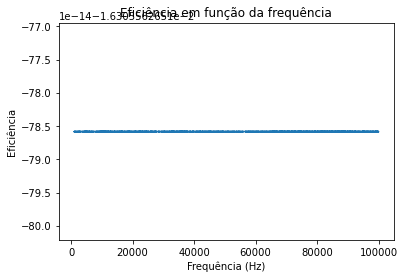

c:\Users\caste\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


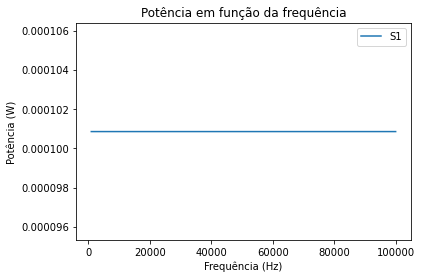

c:\Users\caste\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


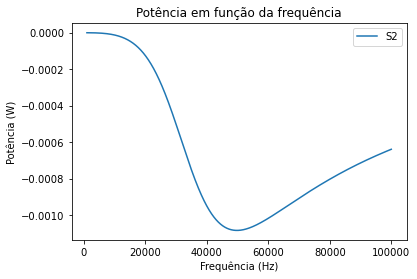

In [247]:
listaS1 = []
listaS2 = []
listaef = []

for f in listafr:
    eficiencia, P1, P2 = CalcularEficiencia(Ufonte, Rc, f)
    listaef.append(eficiencia)
    listaS1.append(P1)
    listaS2.append(P2)

plt.plot(listafr, listaef)
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.title("Eficiência em função da frequência")
plt.show()

plt.plot(listafr, listaS1, label="S1")

plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.title("Potência em função da frequência")
plt.legend()
plt.show()

plt.plot(listafr, listaS2, label="S2")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
plt.title("Potência em função da frequência")
plt.legend()
plt.show()
